In [1]:
import numpy as np
import pandas as pd
from PIL import Image
from wordcloud import WordCloud

import matplotlib.pyplot as plt
% matplotlib inline

In [2]:
file = 'trend-investments-2018.xlsx'
xl=pd.ExcelFile(file)
print(xl.sheet_names)

['Лист1']


In [3]:
data=xl.parse('Лист1')

In [4]:
data.columns

Index(['Тренд', 'Объем инвестиций в млн, 2018'], dtype='object')

In [5]:
#оставляем только то что хотим нарисовать, то есть TOP-30
data=data.head(30)

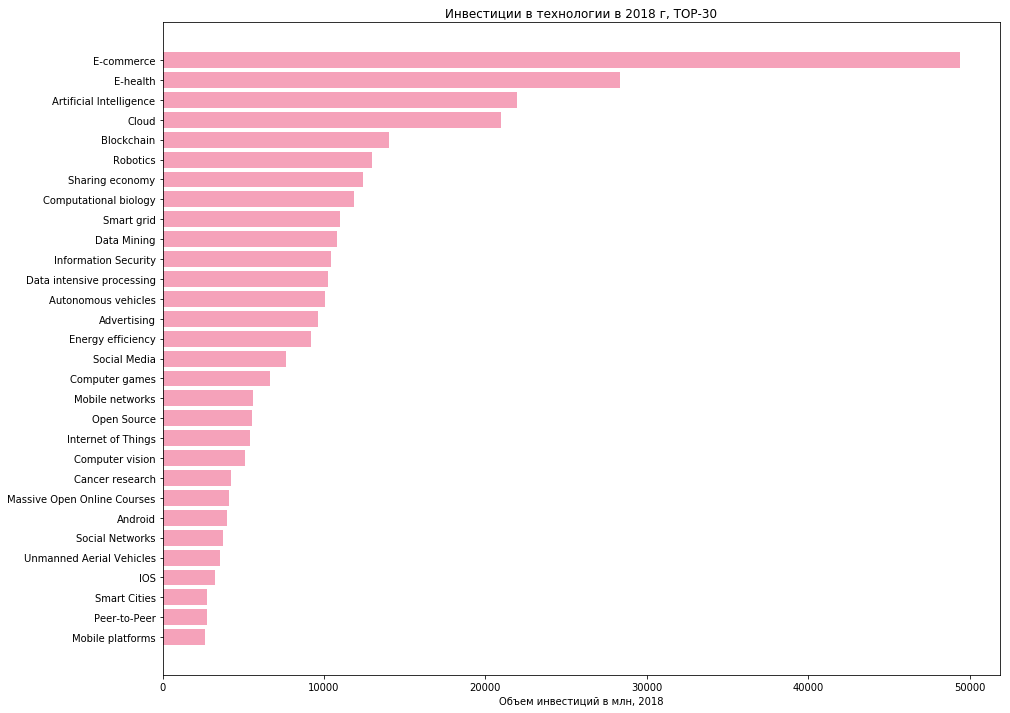

In [6]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 12)


y=data['Тренд'].values
x=data['Объем инвестиций в млн, 2018'].values
y_pos = np.arange(len(y))


ax.barh(y_pos, x, align='center',
        color='#EC4676', ecolor='black', alpha=0.5)
ax.set_yticks(y_pos)
ax.set_yticklabels(y)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Объем инвестиций в млн, 2018')
ax.set_title('Инвестиции в технологии в 2018 г, TOP-30')
fig.savefig('04 - Trends_investments.png', dpi=300)

plt.show()

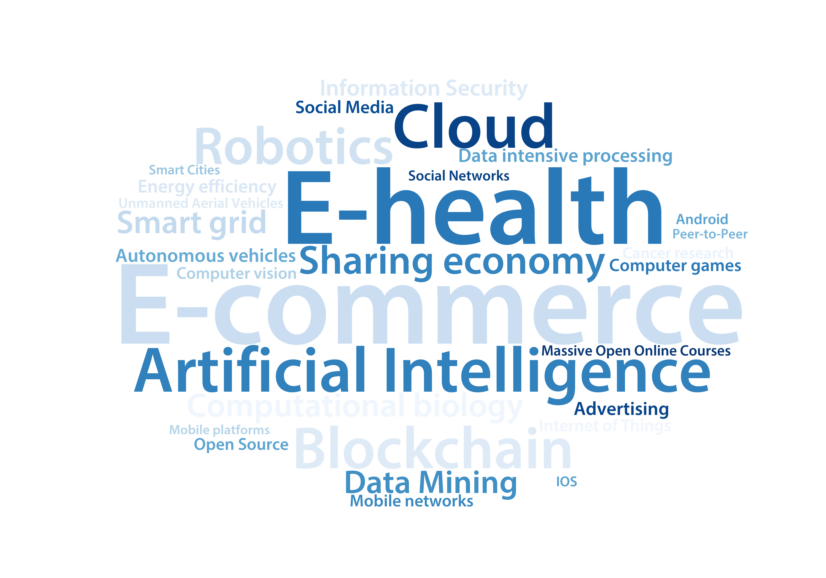

In [7]:
text = dict(zip(y,x))
mask = np.array(Image.open("mask.jpg"))
font_path='/fonts/MyriadPro-Semibold.otf'
wordcloud = WordCloud(prefer_horizontal=1, background_color="white",  relative_scaling=0.2, width=1600, height=800, mask=mask, colormap="Blues", font_path=font_path).generate_from_frequencies(text)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

wordcloud.to_file("01 - Trends_cloud.png")
plt.show()
